In [1]:
import ComputationalHypergraphDiscovery as CHD
import jax.numpy as np
from jax import random
import networkx as nx
import joblib

Finding ancestors with kernel [gaussian]: 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]



Results for $x_1$
Kernel [linear] has n/(n+s)=0.4819620497579062, Z=(0.93, 1.00), gamma=7.79e+01
Kernel [quadratic] has n/(n+s)=0.4868070679159716, Z=(0.87, 0.97), gamma=8.36e+01
Kernel [gaussian] has n/(n+s)=0.1151262674255784, Z=(0.62, 0.77), gamma=1.18e+01
$x_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


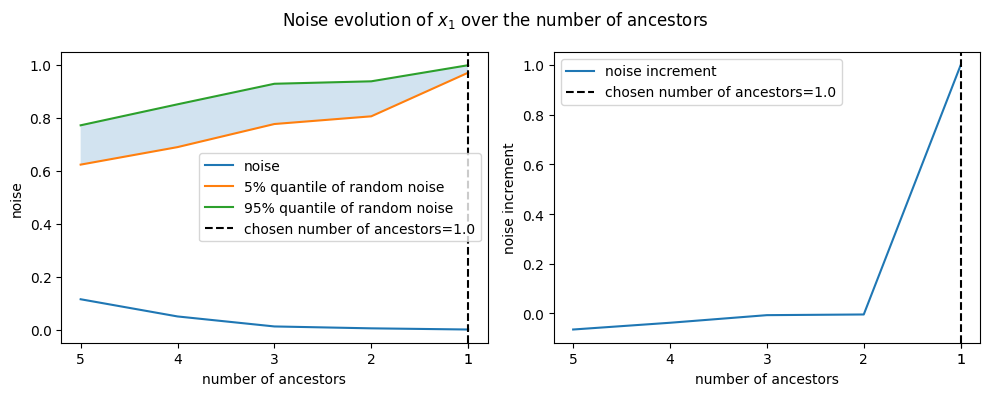

Ancestors of $x_1$: ['$w_1$']


Results for $x_2$
Kernel [linear] has n/(n+s)=0.48979039219588516, Z=(0.94, 1.00), gamma=8.04e+01
Kernel [quadratic] has n/(n+s)=0.486689502944341, Z=(0.86, 0.96), gamma=8.40e+01
Kernel [gaussian] has n/(n+s)=0.12116550275362274, Z=(0.61, 0.78), gamma=1.17e+01
$x_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


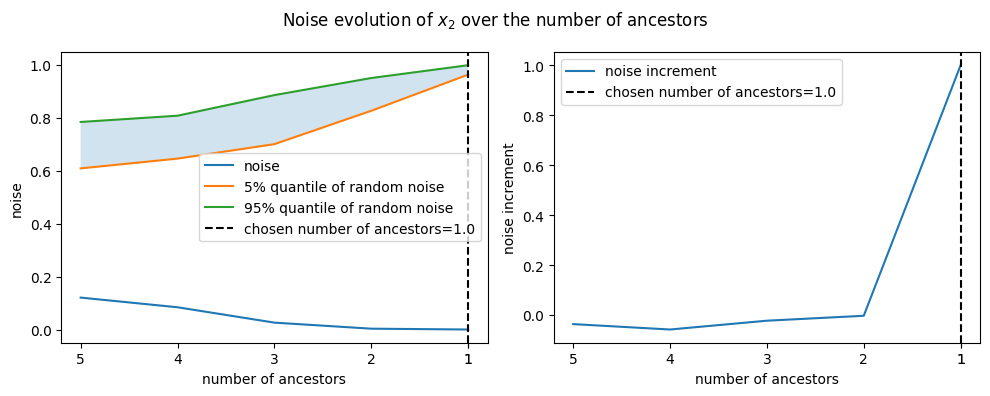

Ancestors of $x_2$: ['$w_2$']


Results for $w_1$
Kernel [linear] has n/(n+s)=0.4819620497579062, Z=(0.94, 1.00), gamma=7.79e+01
Kernel [quadratic] has n/(n+s)=0.4868070679159716, Z=(0.85, 0.97), gamma=8.36e+01
Kernel [gaussian] has n/(n+s)=0.1151262674255784, Z=(0.62, 0.78), gamma=1.18e+01
$w_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


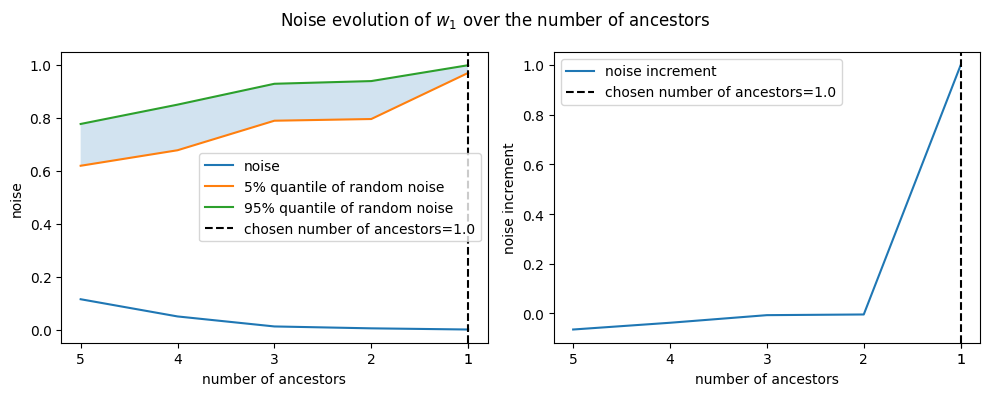

Ancestors of $w_1$: ['$x_1$']


Results for $w_2$
Kernel [linear] has n/(n+s)=0.48979039219588527, Z=(0.93, 0.99), gamma=8.04e+01
Kernel [quadratic] has n/(n+s)=0.4866895029443407, Z=(0.87, 0.98), gamma=8.40e+01
Kernel [gaussian] has n/(n+s)=0.12116550275362269, Z=(0.62, 0.79), gamma=1.17e+01
$w_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


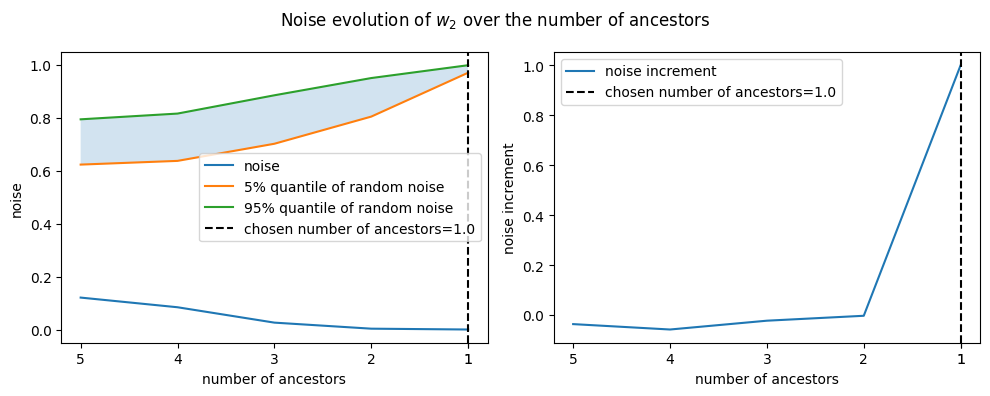

Ancestors of $w_2$: ['$x_2$']


Results for $w_3$
Kernel [linear] has n/(n+s)=0.9892257525198705, Z=(0.95, 1.00), gamma=1.68e+02
Kernel [quadratic] has n/(n+s)=0.9688060044512231, Z=(0.91, 0.98), gamma=2.30e+02
Kernel [gaussian] has n/(n+s)=0.5582519122039388, Z=(0.52, 0.76), gamma=8.05e-01
$w_3$ has no ancestors


Results for $w_4$
Kernel [linear] has n/(n+s)=0.9841165417344602, Z=(0.94, 1.00), gamma=1.39e+02
Kernel [quadratic] has n/(n+s)=0.8985511352059612, Z=(0.89, 0.98), gamma=8.17e+01
Kernel [gaussian] has n/(n+s)=0.6796845189718039, Z=(0.63, 0.82), gamma=7.59e+00
$w_4$ has no ancestors



['predictions-example1.pkl']

In [2]:
key = random.PRNGKey(0)
key, subkey = random.split(key)

# How many samples do we generate for training?
n_train = 42

W_train = random.normal(subkey, (n_train, 4))

X_train=np.concatenate([W_train[:,:2],W_train],axis=1)
node_names=['$x_1$','$x_2$','$w_1$','$w_2$','$w_3$','$w_4$']
graph_discovery1=CHD.GraphDiscovery(X=X_train,names=node_names)
graph_discovery1.fit()
joblib.dump(graph_discovery1, "predictions-example1.pkl")

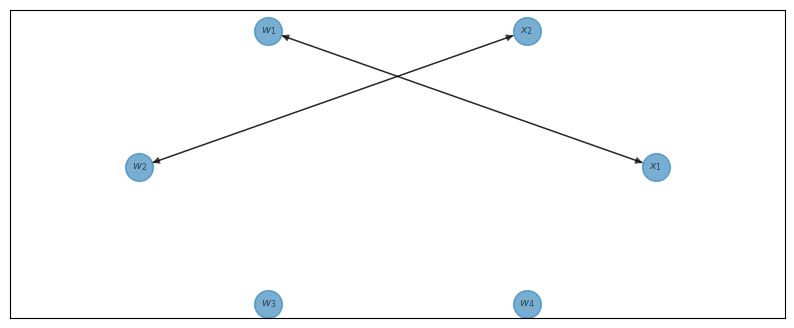

In [3]:
graph_discovery2 = joblib.load('predictions-example1.pkl')
graph_discovery2.plot_graph(type_label=True)

In [4]:
key, subkey = random.split(key)

# How many samples do we generate for prediction?
n_pred1 = n_train

# Create a (n_pred,2) block of all zeros for x1 and x2,
# then concatenate with W_pred to get the 6 total columns.
W_pred1 = random.normal(subkey, (n_pred1, 4))
X_pred1 = np.concatenate([np.zeros((n_pred1, 2)), W_pred1], axis=1)


In [5]:
predictions1 = graph_discovery2.predict(names=node_names, X_pred=X_pred1)

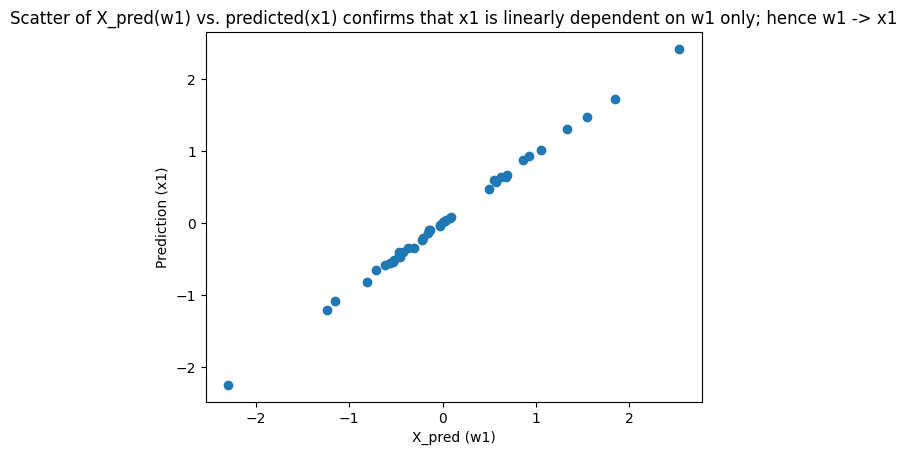

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_pred1[:, 2], predictions1[:, 0])
plt.xlabel(f"X_pred (w1)")
plt.ylabel(f"Prediction (x1)")
plt.title(f"Scatter of X_pred(w1) vs. predicted(x1) confirms that x1 is linearly dependent on w1 only; hence w1 -> x1")
plt.show()

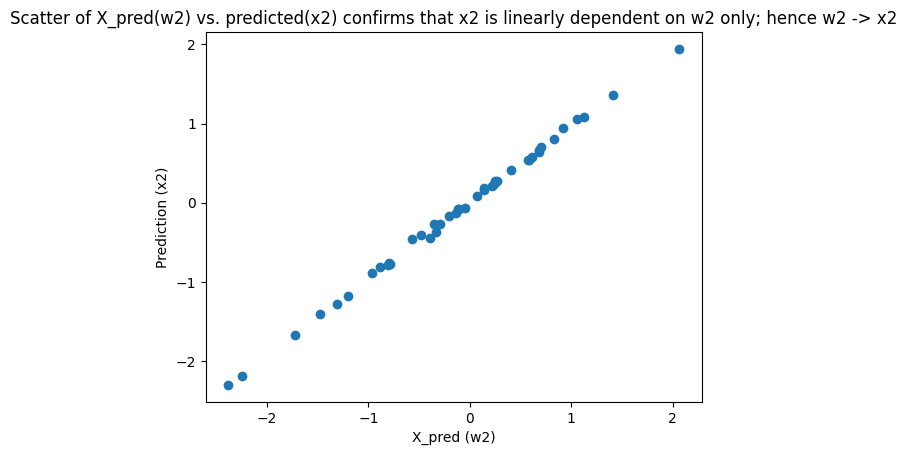

In [7]:
plt.figure()
plt.scatter(X_pred1[:, 3], predictions1[:, 1])
plt.xlabel(f"X_pred (w2)")
plt.ylabel(f"Prediction (x2)")
plt.title(f"Scatter of X_pred(w2) vs. predicted(x2) confirms that x2 is linearly dependent on w2 only; hence w2 -> x2")
plt.show()

In [8]:
key, subkey = random.split(key)

# How many samples do we generate for prediction?
n_pred2 = n_train

# Concatenate W_pred with a (n_pred,2) block of all zeros for w1 and w2 to get the 6 total columns.
W_pred2 = random.normal(subkey, (n_pred2, 4))
X_pred2 = np.concatenate([W_pred2, np.zeros((n_pred2, 2))], axis=1)

In [9]:
predictions2 = graph_discovery2.predict(names=node_names, X_pred=X_pred2)

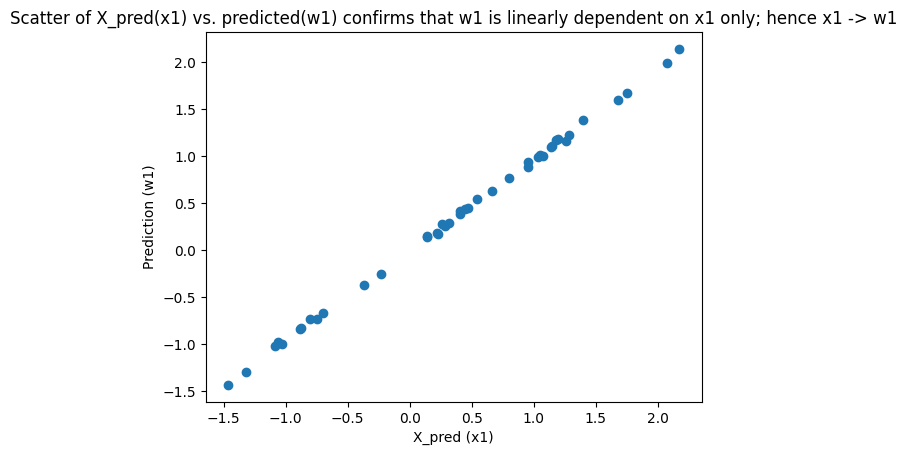

In [10]:
plt.figure()
plt.scatter(X_pred2[:, 0], predictions2[:, 2])
plt.xlabel(f"X_pred (x1)")
plt.ylabel(f"Prediction (w1)")
plt.title(f"Scatter of X_pred(x1) vs. predicted(w1) confirms that w1 is linearly dependent on x1 only; hence x1 -> w1")
plt.show()

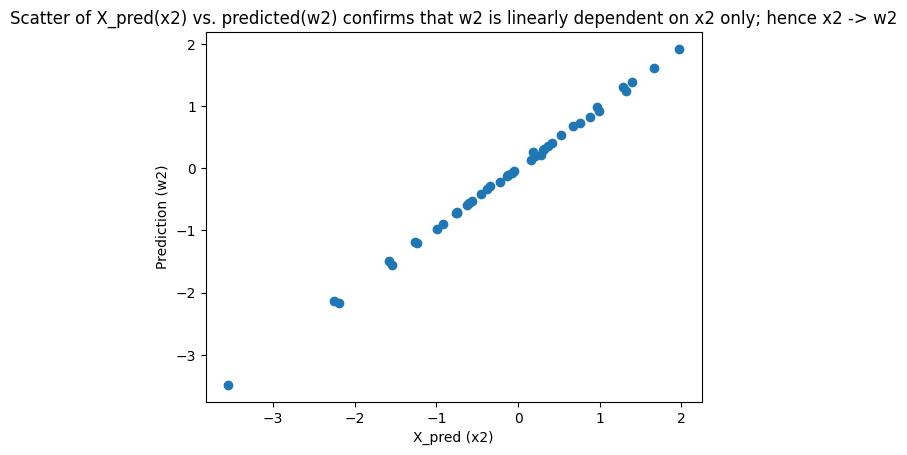

In [11]:
plt.figure()
plt.scatter(X_pred2[:, 1], predictions2[:, 3])
plt.xlabel(f"X_pred (x2)")
plt.ylabel(f"Prediction (w2)")
plt.title(f"Scatter of X_pred(x2) vs. predicted(w2) confirms that w2 is linearly dependent on x2 only; hence x2 -> w2")
plt.show()

In [12]:
key, subkey = random.split(key)

# How many samples do we generate for prediction?
n_pred3 = 10

# Create a (n_pred,2) block of all zeros for x1 and x2,
# then concatenate with W_pred to get the 6 total columns.
W_pred3 = random.normal(subkey, (n_pred3, 4))
X_pred3 = np.concatenate([np.zeros((n_pred3, 2)), W_pred3], axis=1)

In [13]:
predictions3 = graph_discovery2.predict(names=node_names, X_pred=X_pred3)

TypeError: add got incompatible shapes for broadcasting: (42, 42), (10, 42).